In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# import data in notebook
data = pd.read_csv("data/Salary_Data_Based_country_and_race.csv")

In [7]:
data.head() # check head

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [8]:
data.tail()#Check check tail

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [10]:
 #now drop the unname colum no use of it
data.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
#get the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [12]:
# Now check with null values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [13]:
# now check the duplicate values in data
data.duplicated().sum()

1535

In [14]:
#We have to drop the duplicate values from data
data.drop_duplicates(inplace=True)

In [19]:
#now fill null values with median and mode 
data["Age"] = data["Age"].fillna(np.nanmedian(data["Age"]))
data["Salary"] = data["Salary"].fillna(np.nanmedian(data["Salary"]))
data["Years of Experience"] = data["Years of Experience"].fillna(np.nanmedian(data["Years of Experience"]))
data["Gender"] = data["Gender"].fillna(st.mode(data["Gender"]))
data["Education Level"] = data["Education Level"].fillna(st.mode(data["Education Level"]))
data["Job Title"] = data["Job Title"].fillna(st.mode(data["Job Title"]))

In [27]:
# now saprate numerical and catigorical columns
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'Education Level', 'Job Title', 'Country', 'Race'], dtype='object')
Index(['Age', 'Years of Experience', 'Salary'], dtype='object')


In [29]:
#check unique values in catigorical data
try:
    for i in catigorical_features:
        print(i,data[i].unique())
        print("="*100)
except Exception as e:
    print(e)

Gender ['Male' 'Female' 'Other']
Education Level ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Man

In [30]:
#now check with catigorical value counts
try:
    for i in catigorical_features:
        print(i,data[i].value_counts())
        print("="*100)
except Exception as e:
    print(e)

Gender Gender
Male      2813
Female    2343
Other       13
Name: count, dtype: int64
Education Level Education Level
Bachelor's Degree    1695
Master's Degree      1263
PhD                  1076
Bachelor's            566
High School           347
Master's              221
phD                     1
Name: count, dtype: int64
Job Title Job Title
Software Engineer                333
Data Scientist                   326
Software Engineer Manager        313
Full Stack Engineer              264
Senior Project Engineer          257
                                ... 
Account Manager                    1
Help Desk Analyst                  1
Business Intelligence Analyst      1
VP of Finance                      1
Supply Chain Analyst               1
Name: count, Length: 193, dtype: int64
Country Country
USA          1080
UK           1061
Australia    1023
China        1014
Canada        991
Name: count, dtype: int64
Race Race
White               1525
Asian               1227
Australian       

In [33]:
#in gender we have other value less then 13 so for that reason we have to marge with most frequent value in data
data["Gender"] = data["Gender"].map({"Male":"Male","Female":"Female","Other":"Male"})

In [46]:
#in education level some catigory are repated so merge with original one accordingly
data["Education Level"] = data["Education Level"].map({
    "Bachelor's Degree":"Bachelor's Degree",
    "Master's Degree":"Master's Degree",
    "PhD":"PhD",
    "Bachelor's":"Bachelor's Degree",
    "High School":"High School",
    "Master's":"Master's Degree",
    "phD":"PhD"
})

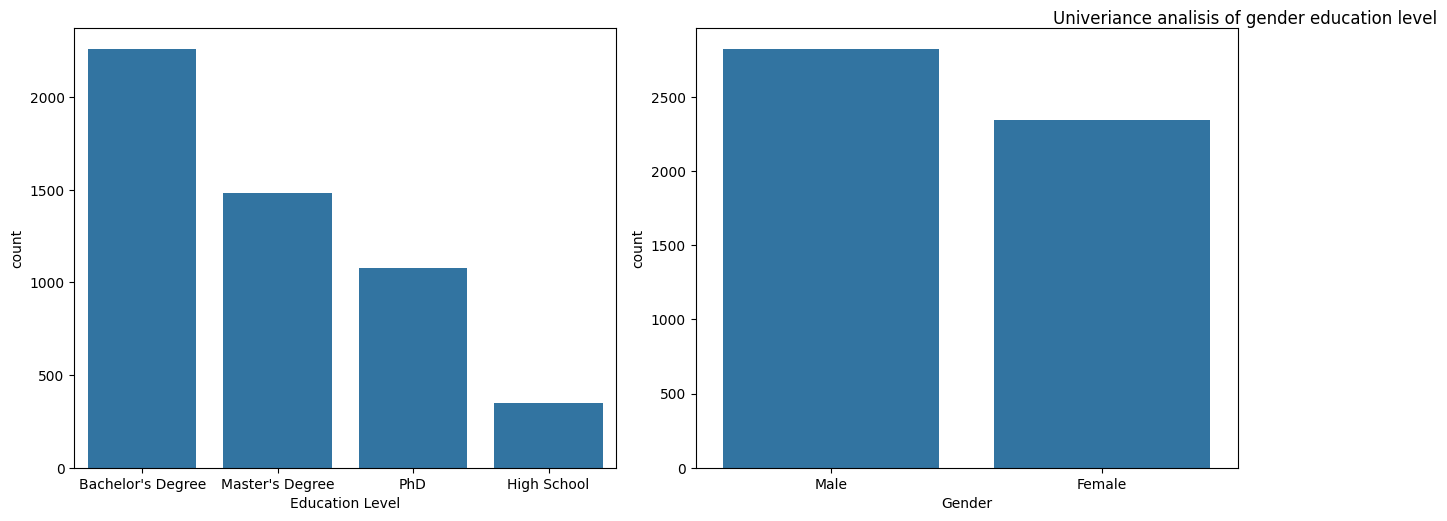

In [54]:
#now univerience analisis of gender and education level
cato = ["Education Level","Gender"]
try:
    plt.figure(figsize=(25,15))
    plt.suptitle("Univeriance analisis of gender education level")
    for i in range(0,len(cato)):
        plt.subplot(3,4,i+1)
        sns.countplot(x=data[cato[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

Text(0.5, 1.0, 'average Salary of Genders')

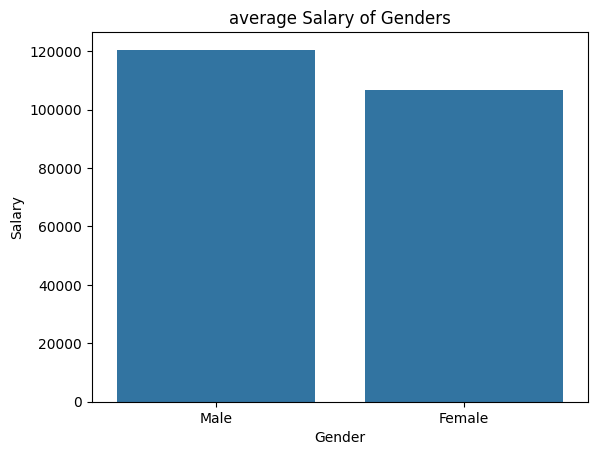

In [70]:
gensel = data.groupby("Gender")["Salary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Gender",y="Salary",data=gensel)
plt.title("average Salary of Genders")

Text(0.5, 1.0, 'average Salary on education level')

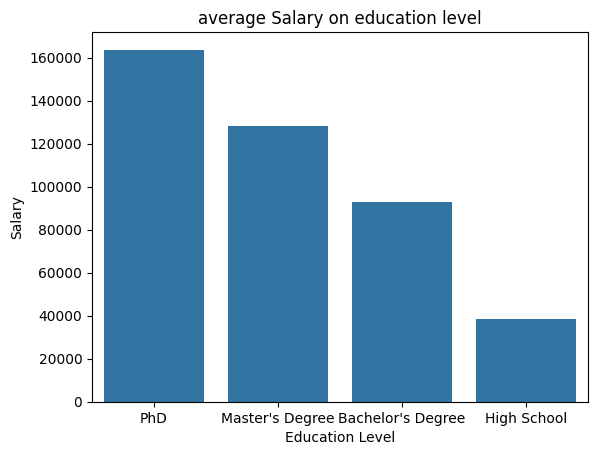

In [71]:
deusel = data.groupby("Education Level")["Salary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Education Level",y="Salary",data=deusel)
plt.title("average Salary on education level")

Text(0.5, 1.0, 'average Salary on country base')

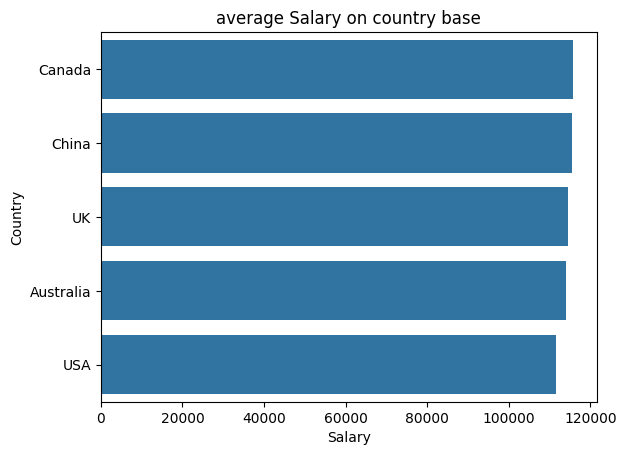

In [72]:
deusel = data.groupby("Country")["Salary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Salary",y="Country",data=deusel)
plt.title("average Salary on country base")

Text(0.5, 1.0, 'average Salary on Race')

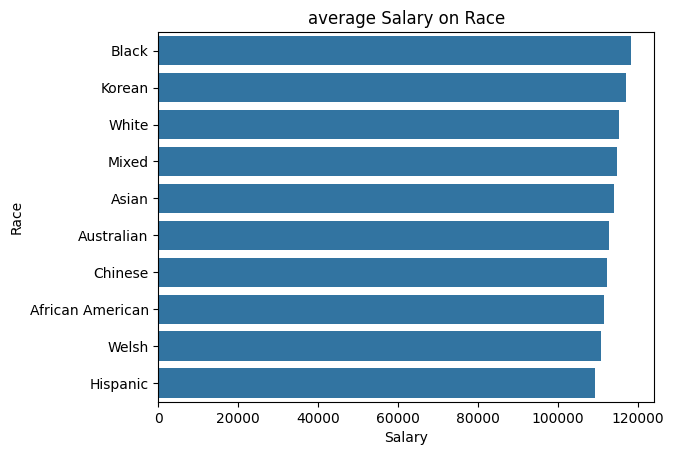

In [73]:
deusel = data.groupby("Race")["Salary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Salary",y="Race",data=deusel)
plt.title("average Salary on Race")

As Per analysis we get to know that country and race is not that imp to predict the output 

In [75]:
# Drope race and Country columns
data.drop(["Country","Race"],axis=1,inplace=True)

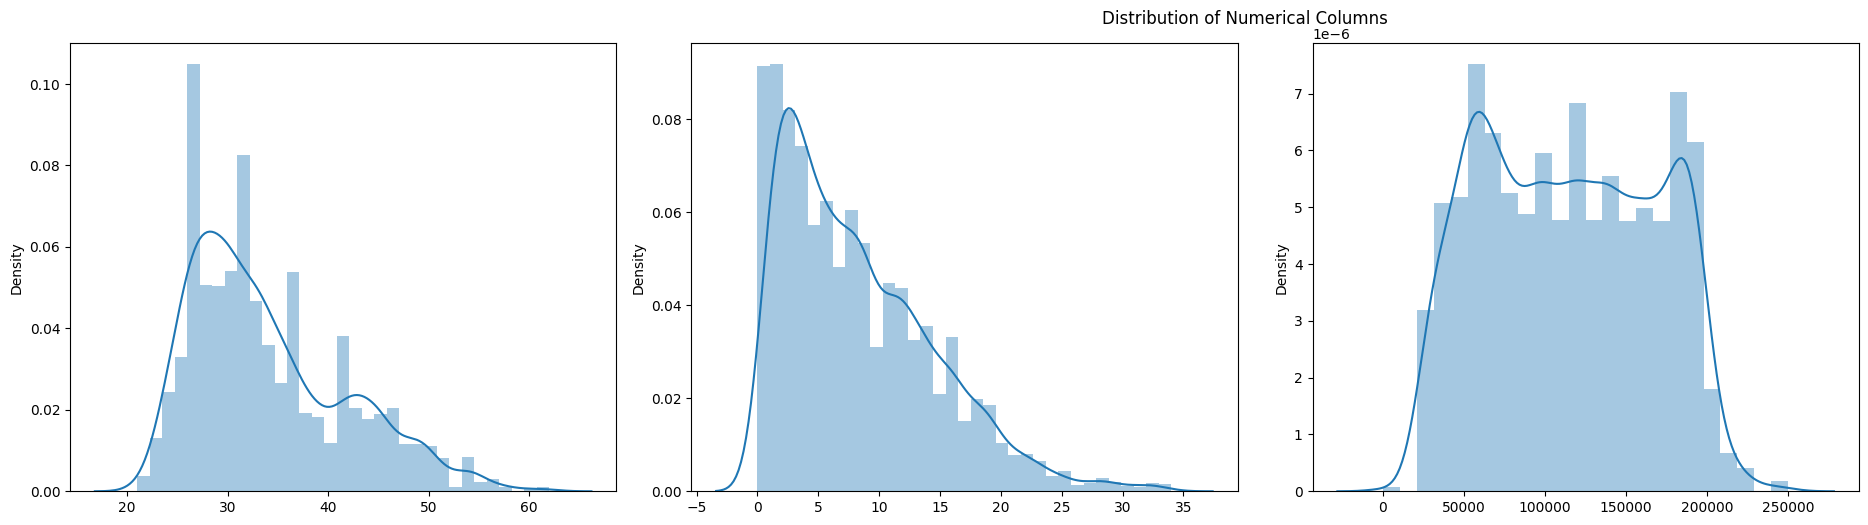

In [77]:
#now check the Distribution of data 
try:
    plt.figure(figsize=(25,15))
    plt.suptitle("Distribution of Numerical Columns")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

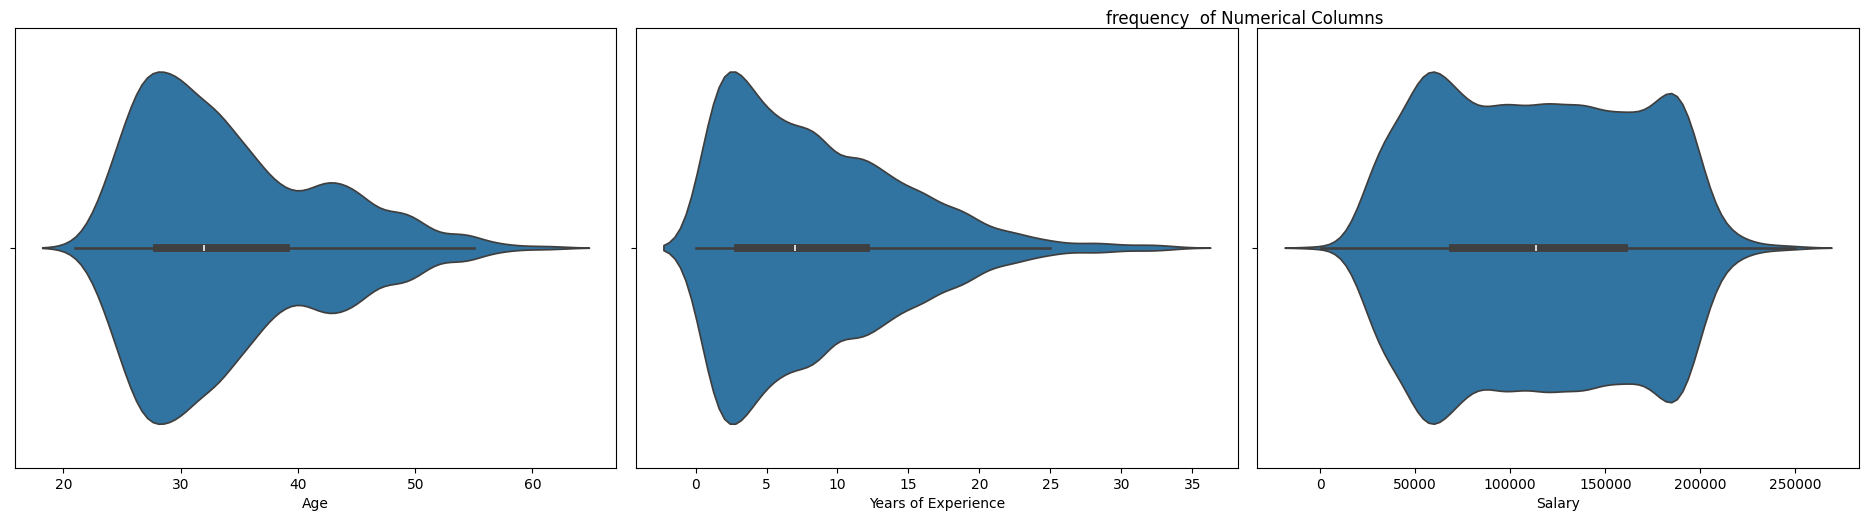

In [78]:
try:
    plt.figure(figsize=(25,15))
    plt.suptitle("frequency  of Numerical Columns")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

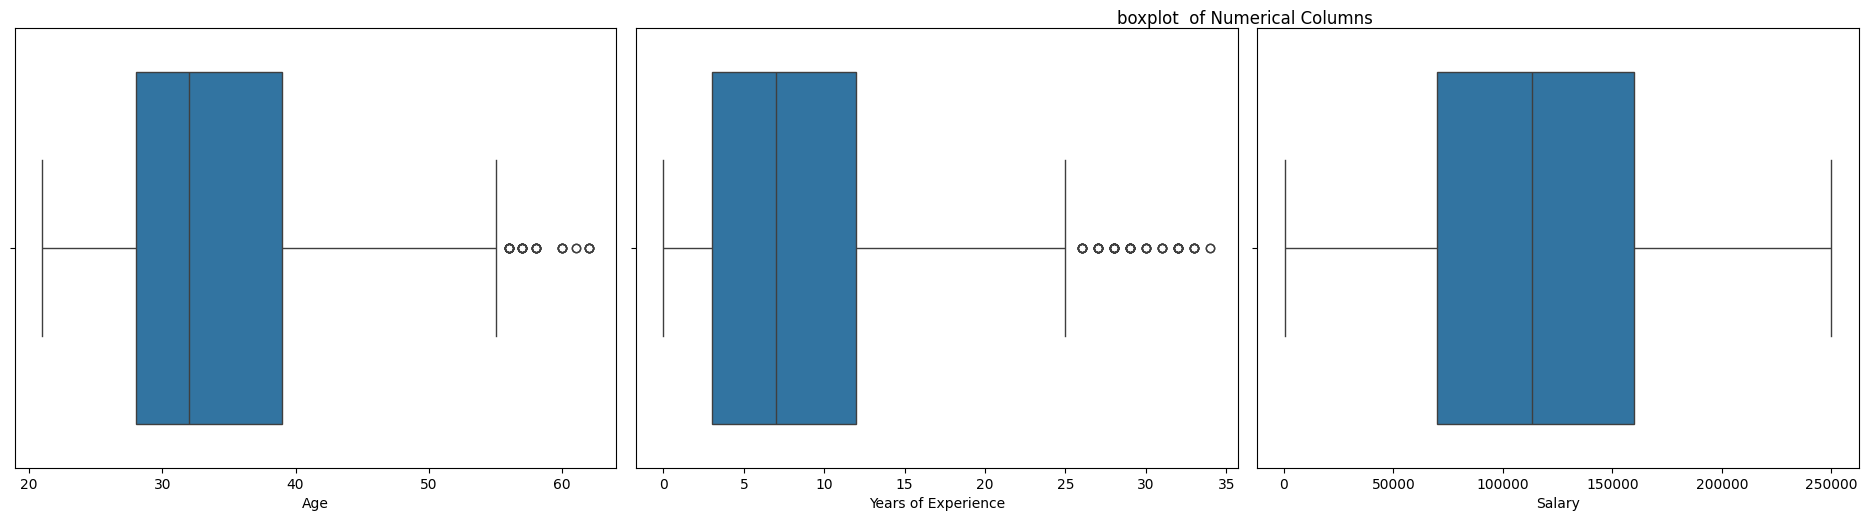

In [79]:
try:
    plt.figure(figsize=(25,15))
    plt.suptitle("boxplot  of Numerical Columns")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

Text(0.5, 1.0, 'average Salary on Years of Experience')

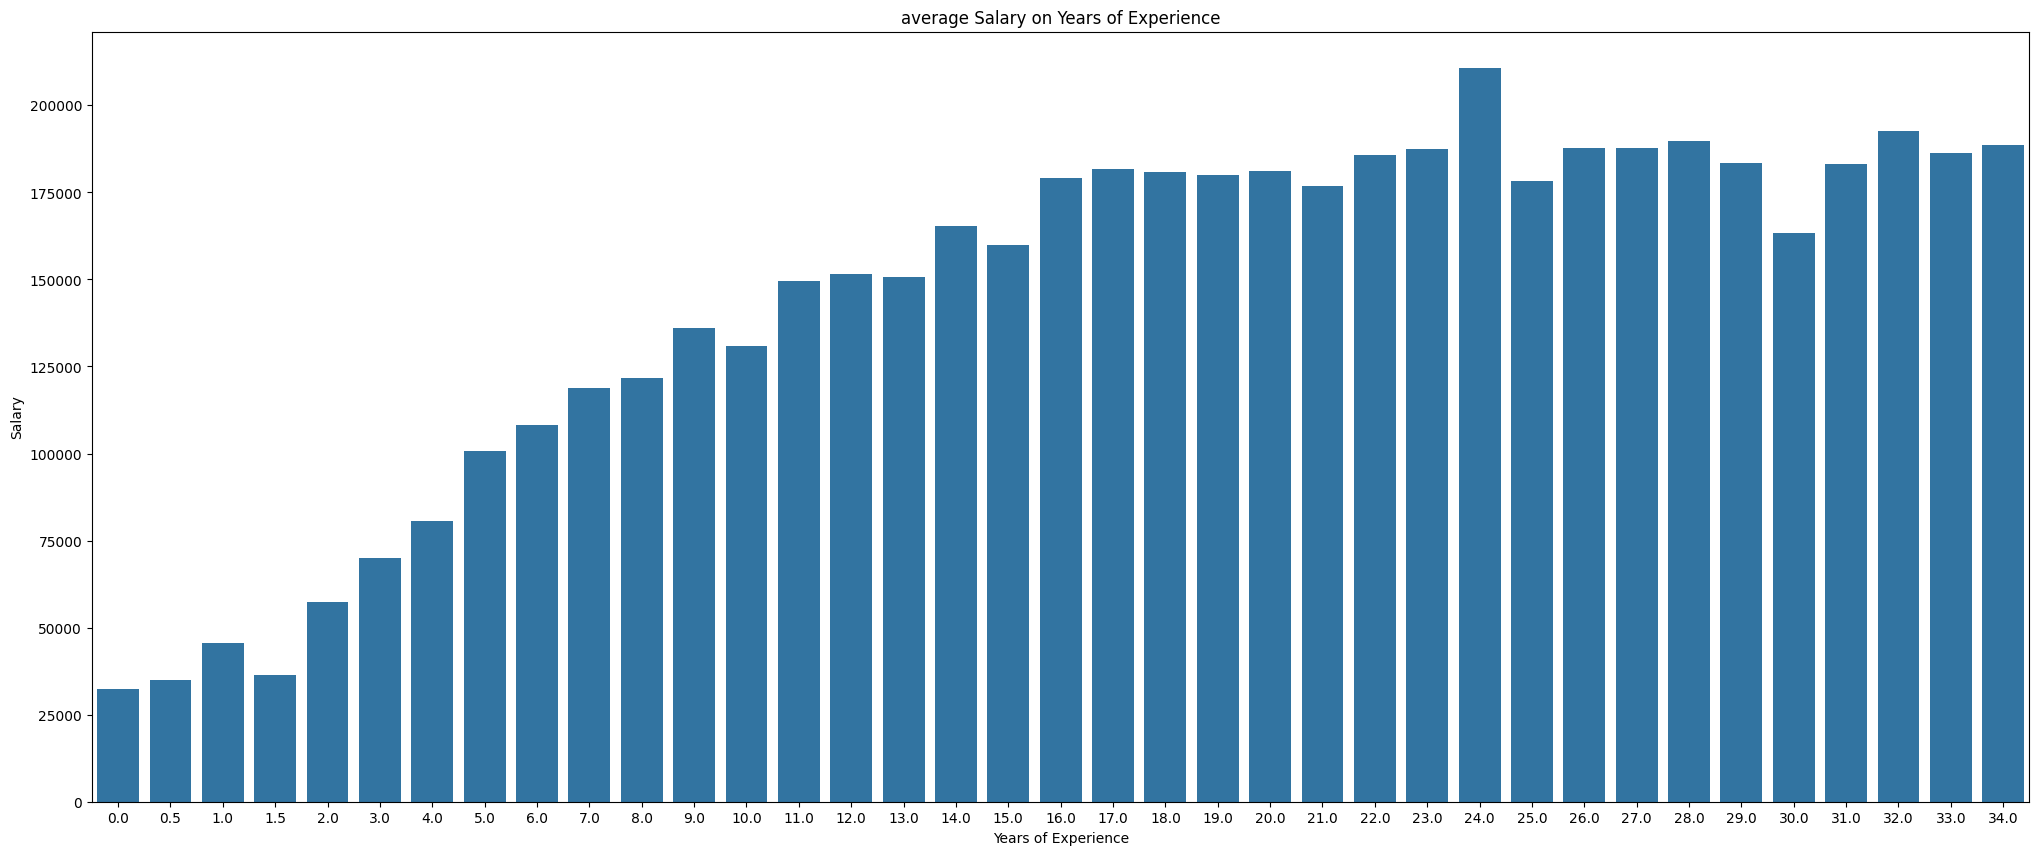

In [83]:
plt.figure(figsize=(25,10))
deusel = data.groupby("Years of Experience")["Salary"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Years of Experience",y="Salary",data=deusel)
plt.title("average Salary on Years of Experience")

<Axes: >

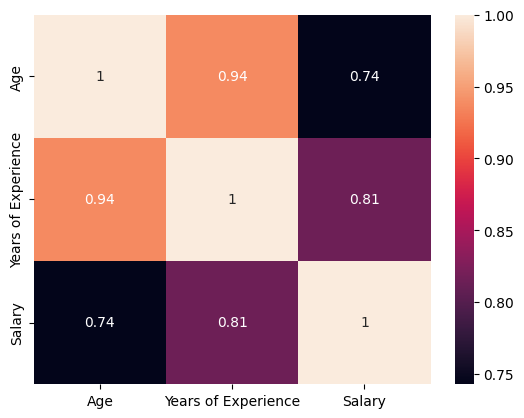

In [85]:
#get corelation
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [97]:
#here we  remove the jobs that value count less then 10 better to predict output
job_title_counts = data['Job Title'].value_counts()
data = data[data['Job Title'].map(job_title_counts) > 10]

Model Traning

In [100]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
5,29.0,Male,Bachelor's Degree,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's Degree,Product Manager,12.0,120000.0
...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's Degree,Junior Sales Representative,6.0,75000.0
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0


In [101]:
data.shape

(4866, 6)

In [102]:
#now saprate the independent and dependent features
x = data.drop("Salary",axis=1)
y = data["Salary"]

In [105]:
# saprate numerical and catigorical features
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')
Index(['Age', 'Years of Experience'], dtype='object')


In [106]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [107]:
#numeric pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# cato_pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehote",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

# create preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3892, 5)
(974, 5)
(3892,)
(974,)


In [110]:
# apply preprocessor object and transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [113]:
X_train.shape

(3892, 59)

In [115]:
X_test.shape

(974, 59)